In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [112]:
df = pd.read_csv('../input/videogamesales/vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [114]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [115]:
df['Year'].fillna(df['Year'].mode()[0], inplace=True)
df['Publisher'].replace(np.nan, df['Publisher'].mode()[0], inplace=True)

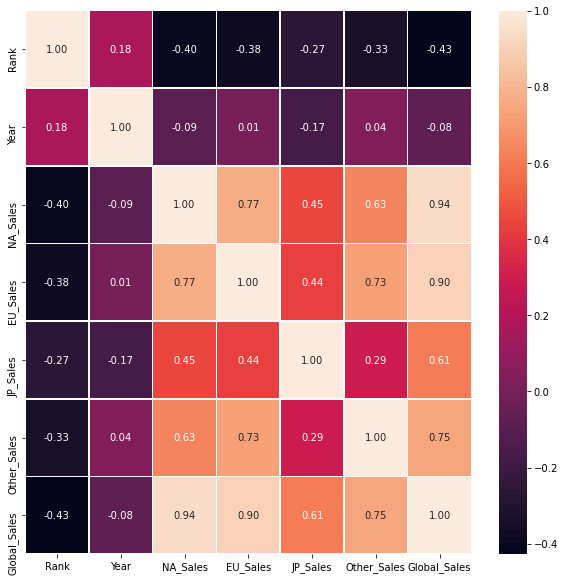

In [116]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

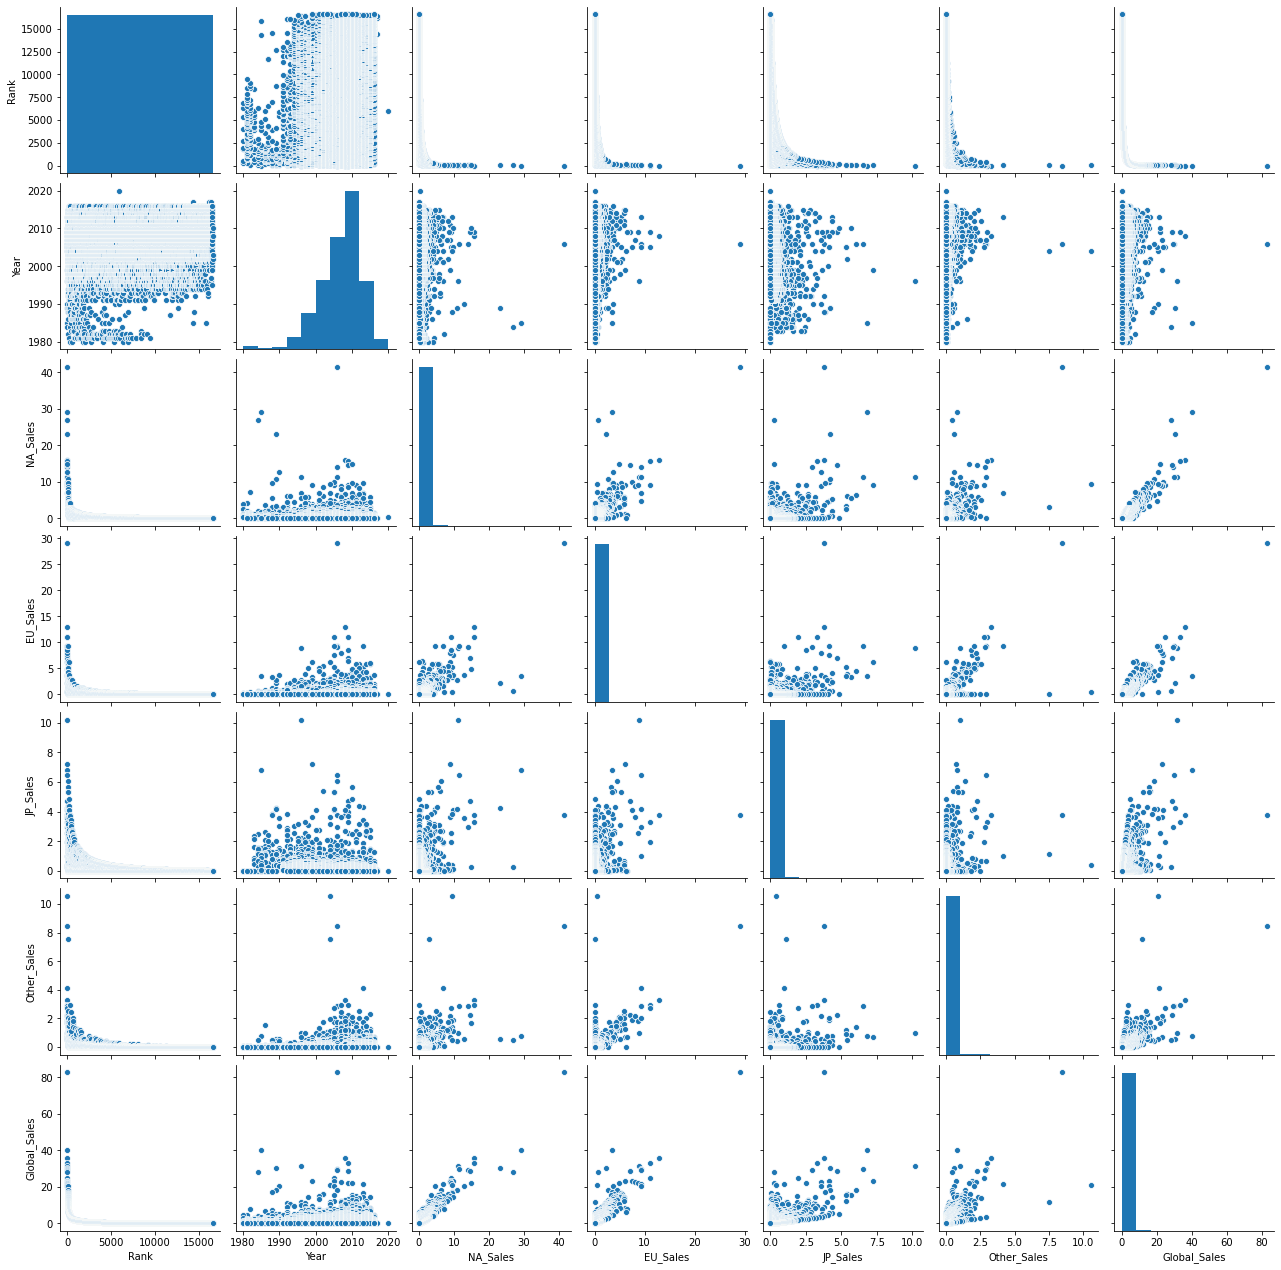

In [117]:
import seaborn as sns
sns.pairplot(df)

In [118]:
df = df.drop( df[['Rank','Year','JP_Sales']], axis = 1)

In [119]:
# Detecting Outliers and removing them

from scipy import stats
col = ['NA_Sales','EU_Sales', 'Other_Sales', 'Global_Sales']
for c in col:
    z = np.abs(stats.zscore(df[c]))
    df[c] = df[c][(z< 3)]


In [120]:
df

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,Sports,Nintendo,NaN,NaN,NaN,NaN
1,Super Mario Bros.,NES,Platform,Nintendo,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,Racing,Nintendo,NaN,NaN,NaN,NaN
3,Wii Sports Resort,Wii,Sports,Nintendo,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.0,0.01
16594,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01,0.00,0.0,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00,0.00,0.0,0.01
16596,Know How 2,DS,Puzzle,7G//AMES,0.00,0.01,0.0,0.01


In [121]:
df = df.dropna()

In [122]:
df

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,Other_Sales,Global_Sales
183,New Super Mario Bros. U,WiiU,Platform,Nintendo,2.32,1.30,0.31,5.19
184,Super Mario Land 3: Wario Land,GB,Platform,Nintendo,2.49,0.98,0.15,5.19
187,Donkey Kong Country 2: Diddy's Kong Quest,SNES,Platform,Nintendo,2.10,0.74,0.11,5.15
191,Kirby's Dream Land,GB,Platform,Nintendo,2.71,0.61,0.11,5.13
203,Super Smash Bros. for Wii U and 3DS,WiiU,Fighting,Nintendo,2.59,1.06,0.57,5.02
...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00,0.00,0.00,0.01
16596,Know How 2,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.01


In [123]:
from sklearn.preprocessing import LabelEncoder
# label encoding of categorical variables
lbe = LabelEncoder()
df['Genre'] = lbe.fit_transform(df['Genre'])
df['Platform'] = lbe.fit_transform(df['Platform'])
df['Publisher'] = lbe.fit_transform(df['Publisher'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [124]:
y = df.Global_Sales
x = df[[ 'Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
       'Other_Sales']]

In [125]:
x

,Platform,Genre,Publisher,NA_Sales,EU_Sales,Other_Sales
183,27,4,359,2.32,1.30,0.31
184,5,4,359,2.49,0.98,0.15
187,23,4,359,2.10,0.74,0.11
191,5,4,359,2.71,0.61,0.11
203,27,2,359,2.59,1.06,0.57
...,...,...,...,...,...,...
16593,6,4,269,0.01,0.00,0.00
16594,7,8,241,0.01,0.00,0.00
16595,16,6,21,0.00,0.00,0.00
16596,4,5,8,0.00,0.01,0.00


In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [127]:
x_train.shape, x_test.shape

((13020, 6), (3255, 6))

Linear Regression

In [128]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [129]:
y_pred =lr.predict(x_test)

In [130]:
import sklearn
sklearn.metrics.mean_absolute_error(y_test, y_pred)

0.08548497544453157

In [131]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

0.03414734075838204

In [132]:
sklearn.metrics.mean_squared_log_error(y_test, y_pred)

0.010376449007410603

In [133]:
sklearn.metrics.r2_score(y_test, y_pred)

0.9083896780501156

Bayesian Ridge

In [134]:
from sklearn import linear_model
regressor_knn = linear_model.BayesianRidge()
regressor_knn.fit(x_train,y_train)
y_pred = regressor_knn.predict(x_test)
r2_knn = sklearn.metrics.r2_score(y_test,y_pred)
sklearn.metrics.mean_squared_error(y_test, y_pred)
print(r2_knn)
import sklearn
print('mae',sklearn.metrics.mean_absolute_error(y_test, y_pred))
print('msle',sklearn.metrics.mean_squared_log_error(y_test, y_pred))
print('mse',sklearn.metrics.mean_squared_error(y_test, y_pred))

0.9083927343674196
mae 0.08548305631185857
msle 0.010376474971772102
mse 0.03414620152967696


Random forest Regressor

In [135]:
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor(n_estimators = 100, criterion = 'mse')
rr.fit(x_train,y_train)
y_pred = rr.predict(x_test)
r2_rr = sklearn.metrics.r2_score(y_test,y_pred)
print(r2_rr)
print('mae',sklearn.metrics.mean_absolute_error(y_test, y_pred))
print('msle',sklearn.metrics.mean_squared_log_error(y_test, y_pred))
print('mse',sklearn.metrics.mean_squared_error(y_test, y_pred))

0.9235840782879048
mae 0.06513581453126727
msle 0.007418309345776865
mse 0.02848369553265229


XGboost

In [136]:
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [137]:
y_pred = regressor_xgb.predict(x_test)

In [138]:
r2_xgb = sklearn.metrics.r2_score(y_test,y_pred)
print('r2',r2_xgb)
print('mae',sklearn.metrics.mean_absolute_error(y_test, y_pred))
print('mse',sklearn.metrics.mean_squared_error(y_test, y_pred))

r2 0.9543798590331615
mae 0.0581983259196655
mse 0.01700470499265639



Xgboost has performed better then other algo's